In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

In [3]:
def seir_model(y, t, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I
    dEdt = beta * S * I - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

In [4]:
# Total population, N
N = 1_000
# Initial number of infected, recovered, and exposed individuals
I0, R0, E0 = 1, 0, 0
# Initial number of susceptible individuals
S0 = N - I0 - R0 - E0

# Transmission rate, beta
beta = 0.3
# Recovery rate, gamma
gamma = 0.1
# Incubation rate, sigma (for SEIR only)
sigma = 0.2

# Initial conditions vector
initial_conditions_sir = [S0 / N, I0 / N, R0 / N]  # Normalize to fractions
initial_conditions_seir = [S0 / N, E0 / N, I0 / N, R0 / N]

In [7]:
# Time grid (days)
t = np.linspace(0, 160, 160)

# Solve SIR model
sir_solution = odeint(sir_model, initial_conditions_sir, t, args=(beta, gamma))

# Solve SEIR model (if applicable)
seir_solution = odeint(seir_model, initial_conditions_seir, t, args=(beta, sigma, gamma))

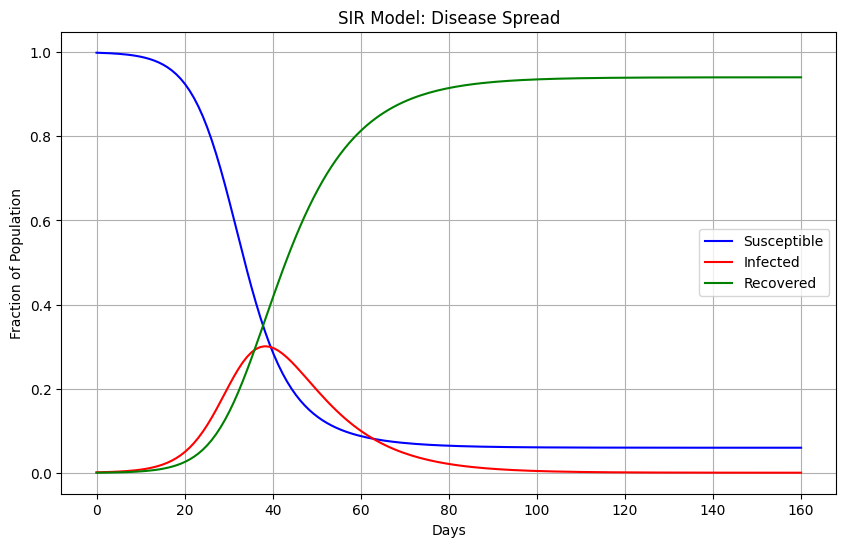

In [6]:
# Extract results for SIR
S, I, R = sir_solution.T

# Plot SIR model
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color='blue')
plt.plot(t, I, label='Infected', color='red')
plt.plot(t, R, label='Recovered', color='green')
plt.title('SIR Model: Disease Spread')
plt.xlabel('Days')
plt.ylabel('Fraction of Population')
plt.legend()
plt.grid()
plt.show()

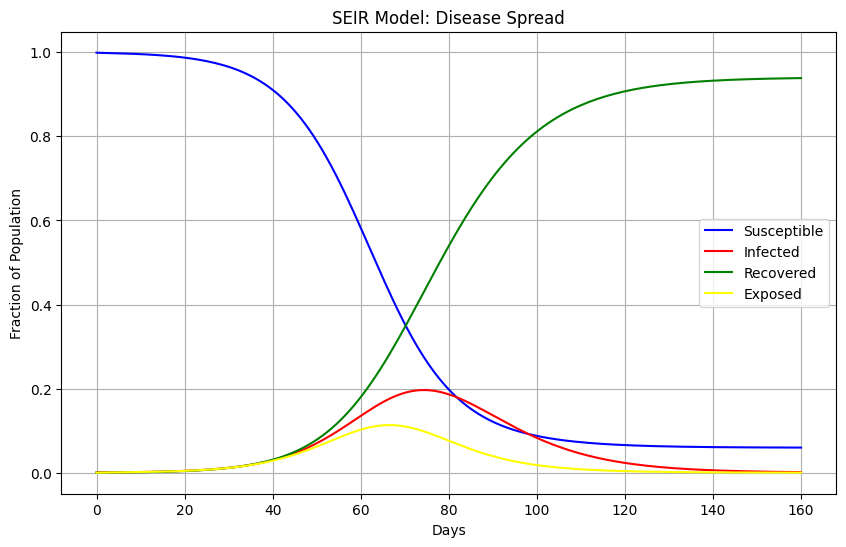

In [13]:
# Extract results for SEIR
S, E, I, R = seir_solution.T

# Plot SEIR model (similar to SIR)
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color='blue')
plt.plot(t, I, label='Infected', color='red')
plt.plot(t, R, label='Recovered', color='green')
plt.plot(t, E, label='Exposed', color='yellow')
plt.title('SEIR Model: Disease Spread')
plt.xlabel('Days')
plt.ylabel('Fraction of Population')
plt.legend()
plt.grid()
plt.show()

In [9]:
# Simulate vaccination by reducing the initial susceptible population
vaccinated_fraction = 0.2
S0_vaccinated = (1 - vaccinated_fraction) * N
initial_conditions_vaccinated = [S0_vaccinated / N, I0 / N, R0 / N]

# Solve again with modified conditions
sir_vaccinated_solution = odeint(sir_model, initial_conditions_vaccinated, t, args=(beta, gamma))

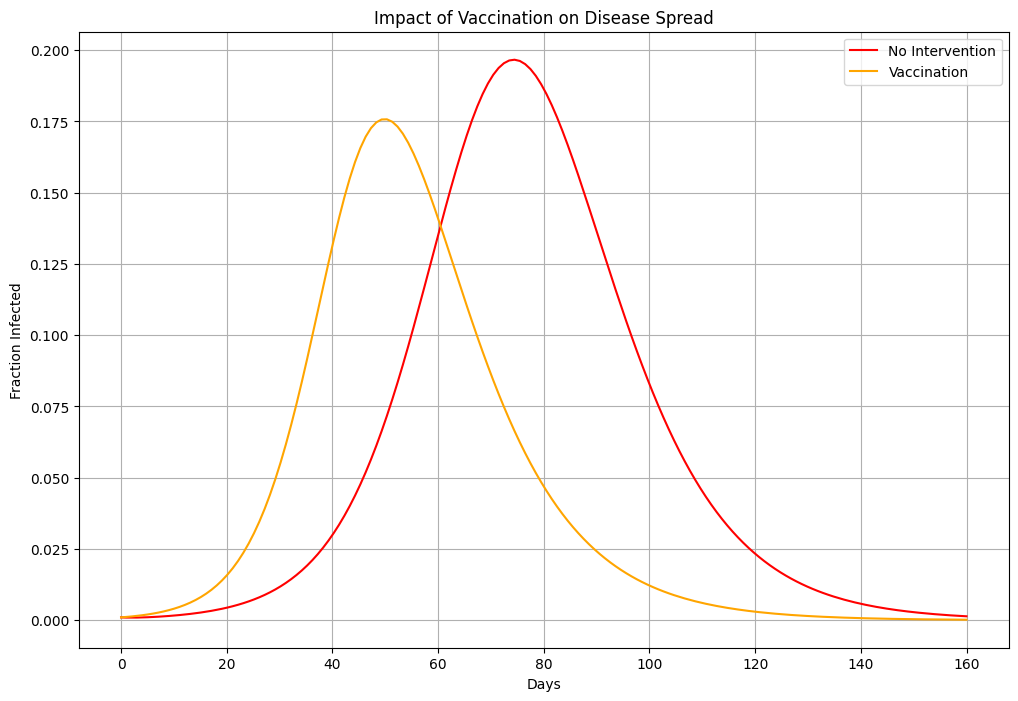

In [10]:
# Comparison plot
plt.figure(figsize=(12, 8))
plt.plot(t, I, label='No Intervention', color='red')
plt.plot(t, sir_vaccinated_solution[:, 1], label='Vaccination', color='orange')
plt.title('Impact of Vaccination on Disease Spread')
plt.xlabel('Days')
plt.ylabel('Fraction Infected')
plt.legend()
plt.grid()
plt.show()

In [12]:
from sympy import symbols, diff

# Partial derivative of dS/dt with respect to beta
S, I, R, beta = symbols('S I R beta')
dSdt = -beta * S * I
partial_dSdt_beta = diff(dSdt, beta)
partial_dSdt_beta

-I*S

In [14]:
from sympy import lambdify

# Create a numerical function from the symbolic expression
from sympy import symbols, diff
from sympy import lambdify
import numpy as np
import matplotlib.pyplot as plt

S, I, beta = symbols('S I beta')
dSdt = -beta * S * I
partial_dSdt_beta = diff(dSdt, beta)

numerical_function = lambdify((S, I, beta), partial_dSdt_beta)

In [15]:
# Generate ranges for S, I, and beta
S_values = np.linspace(1, 1000, 100)  # Susceptible population from 1 to 1000
I_values = np.linspace(1, 500, 100)   # Infected population from 1 to 500
beta_values = np.linspace(0.1, 1, 100)  # Transmission rate from 0.1 to 1

# Select a fixed value for I and beta, and vary S
I_fixed = 100
beta_fixed = 0.5

# Calculate the partial derivative for each S
partial_derivatives = [numerical_function(S, I_fixed, beta_fixed) for S in S_values]

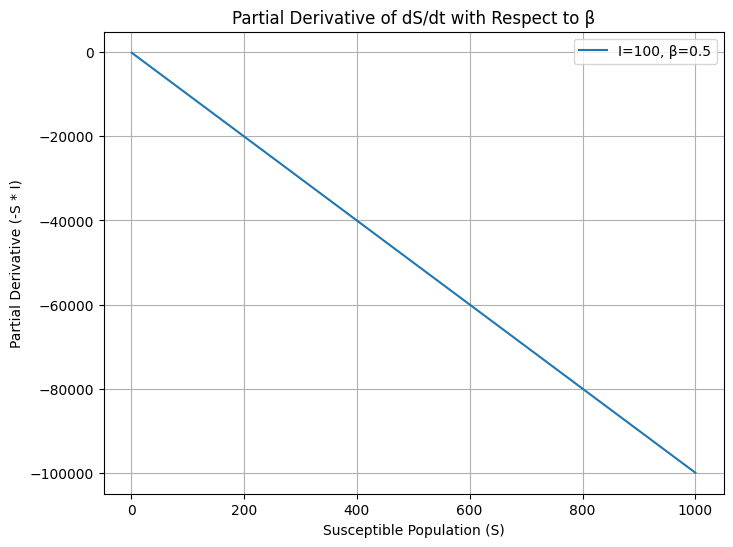

In [16]:
# Plotting the partial derivative
plt.figure(figsize=(8, 6))
plt.plot(S_values, partial_derivatives, label=f'I={I_fixed}, β={beta_fixed}')
plt.title('Partial Derivative of dS/dt with Respect to β')
plt.xlabel('Susceptible Population (S)')
plt.ylabel('Partial Derivative (-S * I)')
plt.legend()
plt.grid(True)
plt.show()

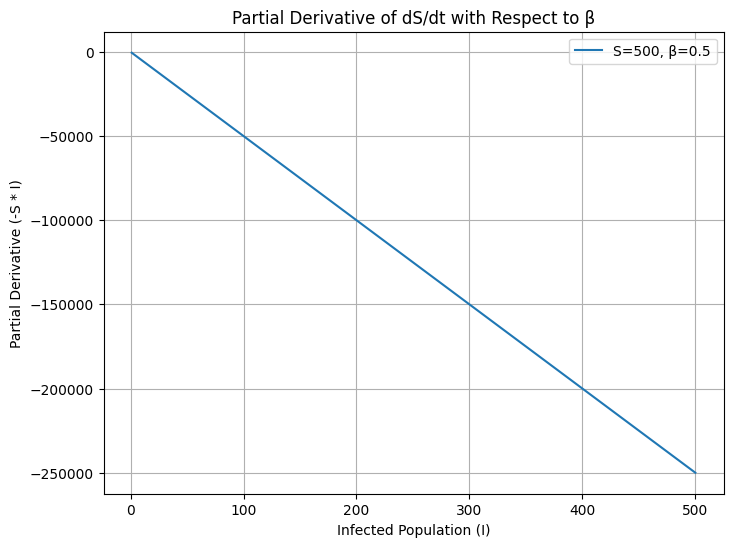

In [17]:
# Varying I instead of S
S_fixed = 500
partial_derivatives_I = [numerical_function(S_fixed, I, beta_fixed) for I in I_values]

# Plot for I
plt.figure(figsize=(8, 6))
plt.plot(I_values, partial_derivatives_I, label=f'S={S_fixed}, β={beta_fixed}')
plt.title('Partial Derivative of dS/dt with Respect to β')
plt.xlabel('Infected Population (I)')
plt.ylabel('Partial Derivative (-S * I)')
plt.legend()
plt.grid(True)
plt.show()